# AI305 - Multilayer Perceptron



The purpose of this lab is to implement multilayer perceptron or fully-connected neural networks (FCNNs) using the MLP implementation from *scikit-learn* 

We will work on MNIST datast. 

### Multilayer perceptron for classification 

*Use the neural network implementation from scikit-learn, i.e. MLPClassifier, to build a classifier to recognize all ten digits in the MNIST data set. Investigate the best architecture for the fully connected neural networks (i.e., number of hidden layers and number of hidden nodes per layer) for this task, and fine-tune all hyper-parameters in the SGD optimizer towards the best possible performance.*
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.predict

In [2]:
# install python_mnist
!pip install python_mnist

In [5]:
import tensorflow as tf
import numpy as np

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()

# Normalize the data
X_train = train_data.astype('float32') / 255.0
X_test = test_data.astype('float32') / 255.0
y_train = train_label.astype('int')
y_test = test_label.astype('int')

# Convert MNIST training labels into 10-D one-hot vectors
Y_train = np.zeros((y_train.size, y_train.max() + 1))
Y_train[np.arange(y_train.size), y_train] = 1

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, Y_train.shape)

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)

In [8]:
from sklearn.neural_network import MLPClassifier

# Define the MLPClassifier with specified hyperparameters
mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500,250,100), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=20, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

# Train the MLPClassifier on the training data
mlp.fit(X_train, y_train)

# Print the training set score
print(f"Training set score: {mlp.score(X_train, y_train):.3f}")

NameError: name 'X_train' is not defined

Return the mean accuracy on the given test data and labels

In [4]:
print(f"Test set score: {mlp.score(X_test, y_test):.3f}")

Test set score: 0.985


Visulaize an image

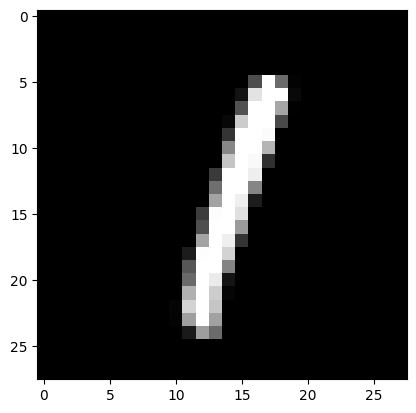

In [5]:
import matplotlib.pyplot as plt
pixels = np.array(X_test[5,:], dtype='float')
pixels = pixels.reshape((28, 28))
#plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()

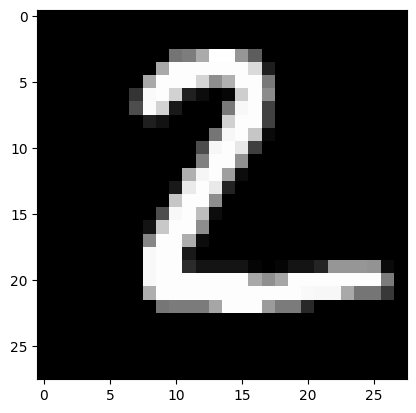

In [9]:
import matplotlib.pyplot as plt
image= X_test[1:2,:]
pixels = np.array(image, dtype='float')
pixels = pixels.reshape((28, 28))
#plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()


In [10]:
mlp.predict(X_test[1:2,:])

array([2], dtype=int16)

## Activity

1. Install cifar10 and cifar100 datasets and build appropriate MLP models for them, showing the accuracy and confusion matrices.
2. explain the results of the previous activity.
2. Investigate applying multilayer preceptron on regression by building a regression model on a regression dataset from the previous labs or any suitable dataset you suggest. 

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10, cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train_10, y_train_10), (x_test_10, y_test_10) = cifar10.load_data()
# Load CIFAR-100 dataset
(x_train_100, y_train_100), (x_test_100, y_test_100) = cifar100.load_data()

# Normalize the data
x_train_10, x_test_10 = x_train_10 / 255.0, x_test_10 / 255.0
x_train_100, x_test_100 = x_train_100 / 255.0, x_test_100 / 255.0

# One-hot encode the labels
y_train_10 = to_categorical(y_train_10, 10)
y_test_10 = to_categorical(y_test_10, 10)
y_train_100 = to_categorical(y_train_100, 100)
y_test_100 = to_categorical(y_test_100, 100)

Exception: URL fetch failure on https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)

In [8]:
def build_mlp_model(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and train MLP model for CIFAR-10
model_10 = build_mlp_model(x_train_10.shape[1:], 10)
model_10.fit(x_train_10, y_train_10, epochs=10, batch_size=64, validation_split=0.2)

# Build and train MLP model for CIFAR-100
model_100 = build_mlp_model(x_train_100.shape[1:], 100)
model_100.fit(x_train_100, y_train_100, epochs=10, batch_size=64, validation_split=0.2)

NameError: name 'x_train_10' is not defined

In [9]:
# Evaluate CIFAR-10 model
y_pred_10 = model_10.predict(x_test_10)
y_pred_classes_10 = y_pred_10.argmax(axis=1)
y_true_classes_10 = y_test_10.argmax(axis=1)
accuracy_10 = accuracy_score(y_true_classes_10, y_pred_classes_10)
conf_matrix_10 = confusion_matrix(y_true_classes_10, y_pred_classes_10)

# Evaluate CIFAR-100 model
y_pred_100 = model_100.predict(x_test_100)
y_pred_classes_100 = y_pred_100.argmax(axis=1)
y_true_classes_100 = y_test_100.argmax(axis=1)
accuracy_100 = accuracy_score(y_true_classes_100, y_pred_classes_100)
conf_matrix_100 = confusion_matrix(y_true_classes_100, y_pred_classes_100)

# Display results
print(f"CIFAR-10 Accuracy: {accuracy_10}")
print(f"CIFAR-100 Accuracy: {accuracy_100}")

# Plot confusion matrices
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_10, annot=True, fmt='d')
plt.title('CIFAR-10 Confusion Matrix')
plt.show()

plt.figure(figsize=(20, 16))
sns.heatmap(conf_matrix_100, annot=True, fmt='d')
plt.title('CIFAR-100 Confusion Matrix')
plt.show()

NameError: name 'model_10' is not defined

In [10]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
boston = load_boston()
X, y = boston.data, boston.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the MLP regression model
model_reg = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model_reg.compile(optimizer='adam', loss='mse')

# Train the model
model_reg.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error:{mse}")

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>
